In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv('googleplaystore/googleplaystoremaster.csv') #fetches data from googleplaystore folder

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape #fetches number of rows and columns

(10841, 13)

In [7]:
data.dtypes #reports data types, all are strings except Rating which is a float

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
data.columns #fetch column names

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
#we only need app name, content rating, genres, and category for analysis so drop the others
data = data.drop(['Rating', 'Reviews', 'Size', 'Installs', 'Last Updated', 'Current Ver', 'Android Ver', 'Price', 'Type'], axis=1) 

In [10]:
data.head()

,App,Category,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,Art & Design;Creativity


In [11]:
data['Content Rating'].unique() # view unique values in Content Rating column

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [13]:
entertainment = data.loc[((data['Category'] == 'ENTERTAINMENT'))] # isolate the entertainment category

In [14]:
entertainment.count() # find total number of Entertainment apps

App               149
Category          149
Content Rating    149
Genres            149
dtype: int64

In [15]:
ratings = entertainment['Content Rating'].value_counts() # get count for each Content Rating
print(ratings)

Content Rating
Teen            96
Everyone        39
Mature 17+       9
Everyone 10+     5
Name: count, dtype: int64


C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


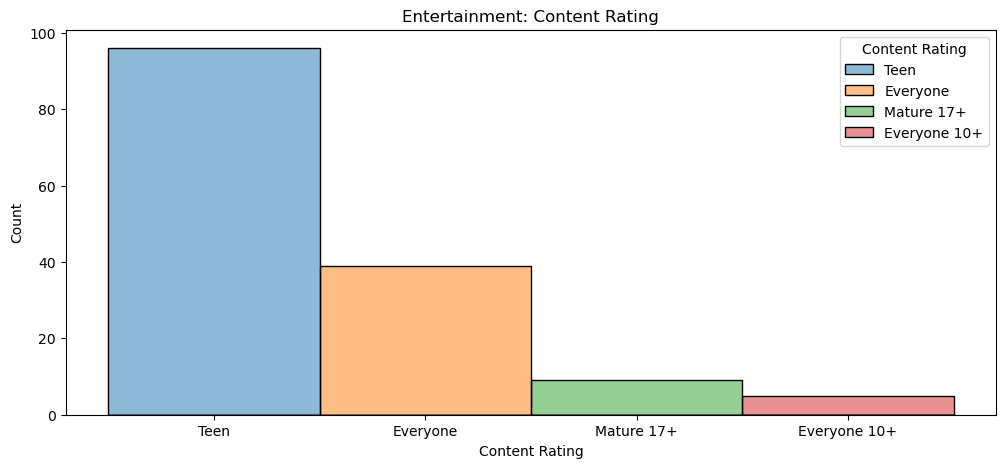

In [19]:
#create a histogram showing count of mature rated games in Entertainment category that we isolated
plt.figure(figsize=(12,5))
sns.histplot(data=entertainment,
            x="Content Rating",
            hue="Content Rating",
            stat="count")
plt.title('Entertainment: Content Rating')
plt.show()